In [6]:
# tensorflow bilgisayarınızda kurulu değilse
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=43ba2b94088a1acb2c42379880417ad7e895d034e32bdc6c0c1a40a4579a7e03
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: keras
    Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [7]:
import keras
from keras import layers

# Kodlanmış verinin boyutu
encoding_dim = 32  # 32 adet float -> girdimiz 784 adet float değerden oluşuyor; yaklaşık 24.5'luk bir sıkıştırma faktörü var

# Girdi resim
input_img = keras.Input(shape=(784,))
# "encoded", girdinin kodlanmış hali
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded", girdinin geri oluşturulmuş hali
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Bu model, bir girdiyi yeniden oluşturulmuş hali ile ilişkilendirmekte 
autoencoder = keras.Model(input_img, decoded)

In [8]:
# Ayrı bir model oluşturalım
# Bu model, bir girdiyi yeniden oluşturulmuş hali ile ilişkilendirmekte 
encoder = keras.Model(input_img, encoded)

In [9]:
# Bu bizim kodlanmış girdimiz
encoded_input = keras.Input(shape=(encoding_dim,))
# Otokodlayıcının son katmanı
decoder_layer = autoencoder.layers[-1]
# Kod çözücü modeli kuralım
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [10]:
# modeli derleyelim
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [11]:
# MNIST el yazısı rakam veri setini yükleyelim
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [12]:
# eğitim ve test verilerini ayrıştıralım ve düzenleyelim
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
# otokodlayıcıyı eğitelim
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 11ms/step - loss: 0.2761 - val_loss: 0.1882
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1681 - val_loss: 0.1507
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1426 - val_loss: 0.1322
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1273 - val_loss: 0.1200
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1169 - val_loss: 0.1114
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1097 - val_loss: 0.1054
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1046 - val_loss: 0.1012
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1010 - val_loss: 0.0985
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0985 - val_loss: 0.0962
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0969 - val_loss

In [14]:
# bazı basamakları kodlayalım ve çözelim
# söz konusu görüntüleri *test* verisi içerisinden seçiyoruz!... 
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


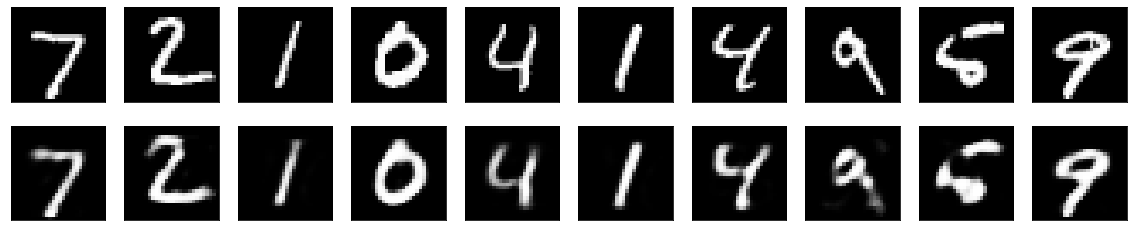

In [15]:
# görselleştirmede Matplotlib kullanıyoruz
import matplotlib.pyplot as plt

n = 10  # görüntüleyeceğimiz basamakların sayısı
plt.figure(figsize=(20, 4))
for i in range(n):
    # orijinal görüntüleri görüntüleyelim
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # sıkıştırılıp yeniden oluşturulmuş görüntüleri görüntüleyelim
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()